# **1. Importações**

## Importação dos Avaliadores

In [1]:
#%pip install autorank

In [2]:
from utils.FileManager import FileManager
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from autorank import autorank, plot_stats, create_report


In [3]:
from avaliacao.AvaliadorDriftBase import AvaliadorBatch
from avaliacao.AvaliadorDriftBase import AvaliadorPassivo
from experimento.ExperimentoDrift import Experimento

## Frameworks

In [4]:
# importando o framework
from frame_oasis.OASIS import OASIS
from frame_winks.WinKS import WinKS

## Importação dos Detectores

In [5]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

## Importação dos Regressores Off-line

In [6]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KneighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

## Importação dos Regressores On-line

In [7]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo
from regressores.modelosOnline.OSELM import OSELMModelo

# **2. Definindo os Dados e Parâmetros**

## Dados

In [8]:
# Lista de séries temporais
series = [
    "AAPL",
    "B3SA3.SA",
    "IXIC",
    "DJI",
    "GSPC",
    "BVSP",
    "USDBRLX"
]

## Parâmetros

In [9]:
# Parâmetros do experimento
tamanho_batch = 300
lags = 10
repeticoes = 30  # Número de execuções para cada modelo-série

# **3. Definindo os Modelos e Avaliadores**

"""{
        "nome": "LR + ADWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": ADWINDetector,
        "deterministico": True
    },
    
    {
        "nome": "LR + HDDM_A",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": HDDM_ADetector,
        "deterministico": True
    },
    
    {
        "nome": "LinearRegressionOnlineModelo",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None,  # Passivo, não usa detector
        "deterministico": True
    },
    
    {
        "nome": "HoeffdingTreeRegressorModelo",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None,  # Passivo, não usa detector
        "deterministico": True
    },
    
    {
        "nome": "OSELMModelo",
        "avaliador": AvaliadorPassivo(),
        "modelo": OSELMModelo,
        "detector": None,  # Passivo, não usa detector
        "deterministico": False
    },"""

In [10]:
modelos = [
    
    {
        "nome": "WinKS",
        "avaliador": WinKS(LinearRegressionModelo, LinearRegressionModelo, KSWINDetector, n_janelas=20, alpha=0.05),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector,
        "deterministico": False
    },
    
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector,
        "deterministico": False
    },
    
]

# **4. Executando o Experimento**

In [11]:
# Criando e executando o experimento
experimento = Experimento(
    series=series,
    modelos=modelos,
    tamanho_batch=tamanho_batch,
    lags=lags,
    repeticoes=repeticoes
)

resultados = experimento.executar()

Executando WinKS na série: AAPL
477 - 15
1153 - 15
1552 - 15
2140 - 15
2584 - 15
3461 - 15
4248 - 30
4740 - 30
5696 - 15
6104 - 15
6577 - 45
7020 - 15
7418 - 15
7864 - 15
8390 - 15
9371 - 30
9875 - 30
10396 - 15
10973 - 15
476 - 15
956 - 15
1411 - 15
1813 - 15
2379 - 15
3055 - 15
3466 - 15
4081 - 15
4470 - 15
5031 - 30
5447 - 30
5868 - 15
6272 - 15
6677 - 15
7081 - 45
7577 - 15
8033 - 15
9127 - 15
9544 - 15
9946 - 15
10504 - 15
10972 - 15
442 - 15
956 - 15
1407 - 30
1808 - 30
2245 - 15
2654 - 15
3460 - 15
4077 - 15
4471 - 15
4860 - 15
5483 - 15
6103 - 15
6678 - 15
7095 - 60
7577 - 15
8034 - 15
8613 - 15
9104 - 15
9557 - 15
9942 - 15
10335 - 15
10774 - 30
484 - 15
954 - 30
1549 - 15
2035 - 15
2585 - 15
3462 - 15
4245 - 30
4658 - 30
5034 - 30
5480 - 30
5879 - 15
6340 - 45
6694 - 30
7085 - 30
7577 - 15
8034 - 15
8609 - 15
9103 - 15
9556 - 15
9943 - 15
10685 - 15
477 - 15
1159 - 45
1552 - 15
2436 - 15
2951 - 15
3337 - 15
3866 - 15
4296 - 15
4743 - 30
5692 - 15
6102 - 15
6678 - 15
7092 - 60

In [12]:
# salvando os resultados
arquivo_salvamento = "Experimento_gabriel.csv"
FileManager.salvar_resultados(resultados, arquivo_salvamento)


Resultados salvos em: Experimento_gabriel.csv


'Experimento_gabriel.csv'

# **5. Análise Estatística dos Resultados**

## Leitura dos Resultados

In [21]:
# 1. Ler o arquivo CSV
df = pd.read_csv(arquivo_salvamento)

## Tabelas de Resultados

In [22]:
# 3. Agrupar por modelo e calcular estatísticas
summary = df.groupby(['serie', 'modelo']).agg(
    mae_mean=('mae', 'mean'),
    mae_std=('mae', 'std'),
    qtd_deteccoes_mean=('qtd_deteccoes', 'mean'),
    qtd_deteccoes_std=('qtd_deteccoes', 'std')
).reset_index()

### Média do MAE

In [23]:
# Tabela para a média do MAE
mae_mean_table = summary.pivot(index='serie', columns='modelo', values='mae_mean')
mae_mean_table

modelo,HoeffdingTreeRegressorModelo,LR + ADWIN,LR + HDDM_A,LR + KSWIN,LinearRegressionOnlineModelo,OSELMModelo,WinKS
serie,,,,,,,
AAPL,0.083247,0.008157,0.010096,0.006900,1.202358e+10,0.015353,0.006586
B3SA3.SA,0.038586,0.030514,0.030429,0.034437,3.858648e-02,0.044037,0.029714
BVSP,0.024016,0.019567,0.020428,0.016491,2.259444e-02,0.022046,0.016191
DJI,0.017122,0.020260,0.041150,0.013411,1.685547e-02,0.018635,0.012315
GSPC,0.120804,0.006533,0.004958,0.005663,1.788413e+10,0.011397,0.005132
IXIC,0.051417,0.010195,0.008503,0.008171,9.147726e+09,0.015228,0.007677
USDBRLX,0.026357,0.019719,0.020380,0.021868,2.635711e-02,0.025008,0.019817


### Desvio do MAE

In [24]:
# Tabela para o desvio padrão do MAE
mae_std_table = summary.pivot(index='serie', columns='modelo', values='mae_std')
mae_std_table

modelo,HoeffdingTreeRegressorModelo,LR + ADWIN,LR + HDDM_A,LR + KSWIN,LinearRegressionOnlineModelo,OSELMModelo,WinKS
serie,,,,,,,
AAPL,0.0,0.0,0.0,0.000184,0.0,0.004629,0.000052
B3SA3.SA,0.0,0.0,0.0,0.002385,0.0,0.005444,0.000448
BVSP,0.0,0.0,0.0,0.000389,0.0,0.002917,0.000435
DJI,0.0,0.0,0.0,0.000482,0.0,0.003416,0.000418
GSPC,0.0,0.0,0.0,0.000262,0.0,0.002241,0.000266
IXIC,0.0,0.0,0.0,0.000245,0.0,0.003367,0.000317
USDBRLX,0.0,0.0,0.0,0.001207,0.0,0.002132,0.000249


### Média Detecções

In [25]:
# Tabela para a média das detecções
deteccoes_mean_table = summary.pivot(index='serie', columns='modelo', values='qtd_deteccoes_mean')
deteccoes_mean_table

modelo,HoeffdingTreeRegressorModelo,LR + ADWIN,LR + HDDM_A,LR + KSWIN,LinearRegressionOnlineModelo,OSELMModelo,WinKS
serie,,,,,,,
AAPL,NaN,2.0,0.0,19.900000,NaN,NaN,20.733333
B3SA3.SA,NaN,1.0,0.0,6.500000,NaN,NaN,6.500000
BVSP,NaN,2.0,0.0,13.100000,NaN,NaN,14.133333
DJI,NaN,2.0,1.0,13.900000,NaN,NaN,14.266667
GSPC,NaN,2.0,0.0,37.966667,NaN,NaN,39.666667
IXIC,NaN,2.0,0.0,21.266667,NaN,NaN,22.000000
USDBRLX,NaN,1.0,0.0,9.066667,NaN,NaN,8.666667


## Teste Estatístico

In [26]:
# 4. Preparar dados para autorank (uma linha por repetição, colunas por modelo)
df_mae = df.pivot_table(index=["serie", "repeticao"], columns="modelo", values="mae")
# Remover qualquer valor NaN para análise (caso haja)
df_mae = df_mae.dropna()
# Tabela de desempenho
df_mae

modelo             HoeffdingTreeRegressorModelo  LR + ADWIN  LR + HDDM_A  \
serie   repeticao                                                          
AAPL    1                              0.083247    0.008157     0.010096   
        2                              0.083247    0.008157     0.010096   
        3                              0.083247    0.008157     0.010096   
        4                              0.083247    0.008157     0.010096   
        5                              0.083247    0.008157     0.010096   
...                                         ...         ...          ...   
USDBRLX 26                             0.026357    0.019719     0.020380   
        27                             0.026357    0.019719     0.020380   
        28                             0.026357    0.019719     0.020380   
        29                             0.026357    0.019719     0.020380   
        30                             0.026357    0.019719     0.020380   

modelo             LR + KSWIN  LinearRegressionOnlineModelo  OSELMModelo  \
serie   repeticao                                                          
AAPL    1            0.006715                  1.202358e+10     0.011293   
        2            0.006851                  1.202358e+10     0.015890   
        3            0.007529                  1.202358e+10     0.012196   
        4            0.006843                  1.202358e+10     0.024605   
        5            0.006866                  1.202358e+10     0.012972   
...                       ...                           ...          ...   
USDBRLX 26           0.020224                  2.635711e-02     0.024769   
        27           0.020069                  2.635711e-02     0.025693   
        28           0.023248                  2.635711e-02     0.024967   
        29           0.022014                  2.635711e-02     0.029709   
        30           0.021449                  2.635711e-02     0.025320   

modelo                WinKS  
serie   repeticao            
AAPL    1          0.006652  
        2          0.006600  
        3          0.006520  
        4          0.006546  
        5          0.006567  
...                     ...  
USDBRLX 26         0.019851  
        27         0.019607  
        28         0.020017  
        29         0.019874  
        30         0.019627  

[210 rows x 7 columns]

In [27]:
# computing the most appropriate statistical test
results = autorank(-df_mae)
# printing the report
create_report(results)

The statistical analysis was conducted for 7 populations with 210 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations LinearRegressionOnlineModelo (p=0.000), HoeffdingTreeRegressorModelo (p=0.000), OSELMModelo (p=0.000), LR + HDDM_A (p=0.000), LR + ADWIN (p=0.000), LR + KSWIN (p=0.000), and WinKS (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of

<Axes: >

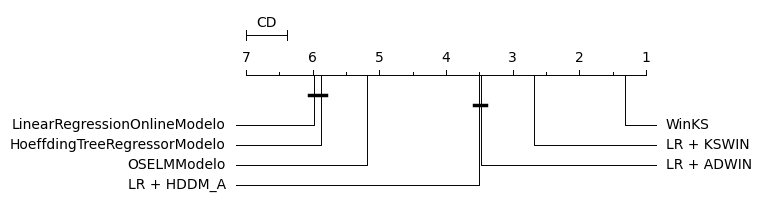

In [28]:
# plotting the results
plot_stats(results, allow_insignificant=True)